# Preliminary study for particle deposition

This notebook is meant to compute an adecuate system of reduced units to work with and also to get an idea of the magnitude of forces acting on the particles.

In [1]:
import numpy as np
import units

In [2]:
unit_length = 4e-6
unit_mass = 1000*unit_length**3
unit_time = 1e-2
glysystem = units.UnitSystem(unit_length = unit_length, 
                             unit_mass=unit_mass,
                             unit_time = unit_time)


In [3]:
glysystem.print_units()

unit_length  =  4e-06   m
unit_area  =  1.6e-11   m^2
unit_volume  =  6.399999999999999e-17   m^3
unit_mass  =  6.399999999999999e-14   kg
unit_density  =  1000.0   kg/m^3
unit_energy  =  1.0239999999999997e-20   J
unit_time  =  0.01   s
unit_velocity  =  0.00039999999999999996   m/s
unit_acceleration  =  0.039999999999999994   m/s^2
unit_force  =  2.5599999999999994e-15   N
unit_stress  =  0.00015999999999999996   N/m^2
unit_dynamic_viscosity  =  1.5999999999999997e-06   kg/(m·s) o Pa·s
unit_kinematic_viscosity  =  1.5999999999999999e-09   m^2/s
density  =  1000   kg/m^3
T  =  300   Kelvin
molar_mass  =  0.01801528   kg/mol
n_dof  =  6   degrees of freedom (molecule)


In [4]:
print("Parameters in REDUCED UNITS:")
print("Unit length [m] = ", glysystem.unit_length)
print("Unit time [s] = ", glysystem.unit_time)
print("dynamic viscosity = ", 1e-3/glysystem.unit_dynamic_viscosity)
print("density 1000kg/m3 = ", 1e3/glysystem.unit_density)
print("Young modulus solids 10Pa = ", 10/glysystem.unit_stress)
print("Time step = 0.5*1e-4 = ", 0.5*1e-4/glysystem.unit_time)
print("============ Magnitude of things =============")
shear_rate = 50 #s-1
Lz = 20.784609690826528 *glysystem.unit_length
Lx = Lz
print("Shear rate = 50s-1 =", shear_rate*glysystem.unit_time)
print("Vertical force = 1e-6N = ", 1e-6/glysystem.unit_force)

Parameters in REDUCED UNITS:
Unit length [m] =  4e-06
Unit time [s] =  0.01
dynamic viscosity =  625.0000000000001
density 1000kg/m3 =  1.0
Young modulus solids 10Pa =  62500.000000000015
Time step = 0.5*1e-4 =  0.005
============ Magnitude of things =============
Shear rate = 50s-1 = 0.5
Vertivcal force = 1e-6N =  390625000.00000006


In [5]:
g = 9.8 #m/s**2
g_vol = 9.8*1000 # N/m**3
print("gravity (vol froce rho = 1000 SI)= ", g_vol/glysystem.unit_force*glysystem.unit_volume)

gravity (vol froce rho = 1000 SI)=  245.00000000000003



Here we can see a graph showing the velocity of ascension of microbubbles under gravity in destiled water.

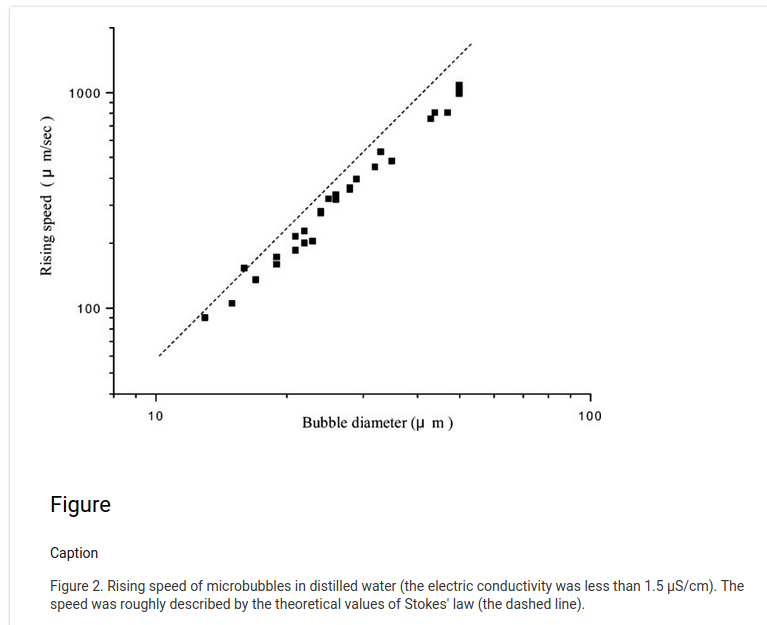

From: Masayoshi TakahashiMasayoshi Takahashi. Zeta Potential of Microbubbles in Aqueous Solutions: Electrical Properties of the Gas-Water. October 2005


As one can see the magnitud of the gravity is not enough to cause an appreciable effect on particles under 10$\mu$m. This is why we should explore higuer accelerations.  



In [6]:
def vol_capsule(Re, Ri):
    return 4/3*np.pi*Re**3 - 4/3*np.pi*Ri**3

F_espresso_3o = 1e4
vol_c3 = vol_capsule(0.5*3, 0.5*3*2/3)
f_vol_ru = F_espresso_3o/vol_c3
f_vol = f_vol_ru*glysystem.unit_force/glysystem.unit_volume

print("Volumetric force in reduced units = ", f_vol_ru)
print("Volumetric force in SI =            ", f_vol)


vol_c1 = vol_capsule(0.5, 0.5*2/3)
force_c1  = vol_c1 * f_vol_ru
print("force vol_c1 = ", force_c1 )
vol_c25 = vol_capsule(0.5*0.25, 0.5*0.25*2/3)
force_c25 = vol_c25 * f_vol_ru
print("force vol_c25 = ", force_c25 )

Volumetric force in reduced units =  1005.1891142646023
Volumetric force in SI =             40207.56457058409
force vol_c1 =  370.37037037037044
force vol_c25 =  5.787037037037038


In [7]:
vol_c1/vol_c3

0.03703703703703704

In [8]:
a = 0.5*3
grho_ru = 9.8*1000 / glysystem.unit_force*glysystem.unit_volume
print(grho_ru)
vol_sphere_c3 = 4/3*np.pi*a**3
print("force acting on sphere (ru) 5g*rho = ", 5*grho_ru*vol_sphere_c3)

245.00000000000003
force acting on sphere (ru) 5g*rho =  17318.029502913734


In [9]:
a = 0.5
grho_ru = 9.8*1000 / glysystem.unit_force*glysystem.unit_volume
print(grho_ru)
vol_sphere_c3 = vol_capsule(a, a*2/3)
print("force acting on sphere (ru) 100g*rho = ", 100*grho_ru*vol_sphere_c3)

245.00000000000003
force acting on sphere (ru) 100g*rho =  9027.230742259562


In [10]:
print("para capsula de veces el diámetro del blob")
a = 0.5
grho_ru = 9.8*1000 / glysystem.unit_force*glysystem.unit_volume
print(grho_ru)
vol_c3 = vol_capsule(a, a*2/3)
print("force acting on sphere (ru) 5g*rho = ", 5*grho_ru*vol_c3)
print("force acting on sphere (ru) 10g*rho = ", 10*grho_ru*vol_c3)
print("force acting on sphere (ru) 100g*rho = ", 100*grho_ru*vol_c3)

para capsula de veces el diámetro del blob
245.00000000000003
force acting on sphere (ru) 5g*rho =  451.3615371129781
force acting on sphere (ru) 10g*rho =  902.7230742259562
force acting on sphere (ru) 100g*rho =  9027.230742259562


In [16]:
print("Este es el bond elastico de espresso para E=6250 en el SI")
print(253.550543452*glysystem.unit_stress*glysystem.unit_area/glysystem.unit_length)

Este es el bond elastico de espresso para E=6250 en el SI
1.6227234780927995e-07


In [17]:
print("Este es el bond bending de espresso para E=6250 en el SI (N)")
print(4462.48956476*glysystem.unit_stress*glysystem.unit_area)

Este es el bond bending de espresso para E=6250 en el SI (N)
1.1423973285785596e-11


In [19]:
6*glysystem.unit_length

2.4e-05

In [20]:
rho = 1000 #kg/m3
eta = 0.001 #Pa·s
u = 0.15*glysystem.unit_velocity # m/s
L = glysystem.unit_length #m
Re = rho*u*L/eta
print("Re = "+str(Re))

Re = 0.00023999999999999998
